In [3]:
import tweepy
import pandas as pd
import json

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Gute Referenz, der ich den meisten Code für den Datendownload verdanke:
https://www.packtpub.com/big-data-and-business-intelligence/mastering-social-media-mining-python. 

Falls der Code selbst ausgeführt werden soll, müssen hier die eigenen Twitter-Keys verwendet werden. Details siehe auch in der Referenz oben.

In [5]:
consumer_key = 'XXX'
consumer_secret = 'XXX'
access_token = 'XXX'
access_secret = 'XXX'

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_secret) 

In [7]:
client = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
users = ('derStandardat', 'KURIERat', 'ArminWolf', 'SPIEGEL_Top')
# last tweet from @diepresse_com in 2012
# last tweet from @oe24News in April 2016

# Herunterladen der Tweets
Da derStandard.at mit dem 2016-10-26 das 3.200 Tweet Limit der Twitter API erreicht, lade ich nur Nov und Dez herunter

In [9]:
for user in users:
    print('getting data for {}'.format(user))
    fname = "user_timeline_{}.jsonl".format(user) 
    with open(fname, 'w') as f: 
        for page in tweepy.Cursor(client.user_timeline, screen_name=user, count=200).pages(16): 
            for status in page: 
                if (status.created_at.year == 2016) & (status.created_at.month > 10):
                    f.write(json.dumps(status._json)+"\n") 
                else:
                    break

getting data for derStandardat
getting data for KURIERat
getting data for ArminWolf
getting data for SPIEGEL_Top


# Tweets in Datenframe zusammenfassen

In [10]:
tweets = [pd.read_json(fname, lines=True) for fname in ["user_timeline_{}.jsonl".format(user) for user in users]]
df = pd.concat(tweets).reset_index(drop=True)

In [11]:
df[:3]

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,NaN,2016-12-31 21:30:09,"{'hashtags': [], 'urls': [{'expanded_url': 'ht...",NaN,0,False,NaN,815309091266592768,815309091266592768,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://swat.io"" rel=""nofollow"">Swat.i...","Rund 10 Prozent der Österreicher ""schwänzen"" h...",False,"{'profile_background_tile': False, 'is_transla..."
1,NaN,NaN,2016-12-31 21:00:22,"{'hashtags': [], 'urls': [{'expanded_url': 'ht...",NaN,1,False,NaN,815301597106491396,815301597106491392,...,NaN,NaN,NaN,2,False,NaN,"<a href=""http://swat.io"" rel=""nofollow"">Swat.i...",Anderswo ist schon seit Stunden 2017. So feier...,False,"{'profile_background_tile': False, 'is_transla..."
2,NaN,NaN,2016-12-31 20:30:09,"{'hashtags': [], 'urls': [{'expanded_url': 'ht...",NaN,2,False,NaN,815293991151370240,815293991151370240,...,NaN,NaN,NaN,5,False,NaN,"<a href=""http://swat.io"" rel=""nofollow"">Swat.i...","""Zweifel an menschenwürdiger Unterbringung"": B...",False,"{'profile_background_tile': False, 'is_transla..."


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9627 entries, 0 to 9626
Data columns (total 29 columns):
contributors                 0 non-null float64
coordinates                  0 non-null float64
created_at                   9627 non-null datetime64[ns]
entities                     9627 non-null object
extended_entities            244 non-null object
favorite_count               9627 non-null int64
favorited                    9627 non-null bool
geo                          0 non-null float64
id                           9627 non-null int64
id_str                       9627 non-null int64
in_reply_to_screen_name      1690 non-null object
in_reply_to_status_id        1673 non-null float64
in_reply_to_status_id_str    1673 non-null float64
in_reply_to_user_id          1690 non-null float64
in_reply_to_user_id_str      1690 non-null float64
is_quote_status              9627 non-null bool
lang                         9627 non-null object
place                        0 non-null float

In [13]:
df.columns

Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'quoted_status', 'quoted_status_id',
       'quoted_status_id_str', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'text', 'truncated', 'user'],
      dtype='object')

Username aus Spalte 'user' extrahieren und ergänzen

In [14]:
df_user = pd.DataFrame(df.user.tolist())
df_user.columns

Index(['contributors_enabled', 'created_at', 'default_profile',
       'default_profile_image', 'description', 'entities', 'favourites_count',
       'follow_request_sent', 'followers_count', 'following', 'friends_count',
       'geo_enabled', 'has_extended_profile', 'id', 'id_str',
       'is_translation_enabled', 'is_translator', 'lang', 'listed_count',
       'location', 'name', 'notifications', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_banner_url', 'profile_image_url',
       'profile_image_url_https', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image', 'protected',
       'screen_name', 'statuses_count', 'time_zone', 'translator_type', 'url',
       'utc_offset', 'verified'],
      dtype='object')

In [15]:
df_user.name.value_counts()

derStandard.at        2981
KURIER                2583
Armin Wolf            2272
SPIEGEL ONLINE Top    1791
Name: name, dtype: int64

In [17]:
df_user[:2]

,contributors_enabled,created_at,default_profile,default_profile_image,description,entities,favourites_count,follow_request_sent,followers_count,following,...,profile_text_color,profile_use_background_image,protected,screen_name,statuses_count,time_zone,translator_type,url,utc_offset,verified
0,False,Fri Mar 06 16:43:22 +0000 2009,False,False,Aus dem Newsroom der österreichischen Tageszei...,{'description': {'urls': [{'expanded_url': 'ht...,2884,False,246282,False,...,000000,True,False,derStandardat,67690,Vienna,none,http://t.co/0N5NEkJcaI,3600,True
1,False,Fri Mar 06 16:43:22 +0000 2009,False,False,Aus dem Newsroom der österreichischen Tageszei...,{'description': {'urls': [{'expanded_url': 'ht...,2884,False,246282,False,...,000000,True,False,derStandardat,67690,Vienna,none,http://t.co/0N5NEkJcaI,3600,True


In [18]:
df = df.join([df_user.name])

Wer hat wieviele Followers?

In [32]:
df_user.drop_duplicates(subset=('name'))[['name', 'followers_count']].sort_values('followers_count', ascending=False)

,name,followers_count
5564,Armin Wolf,323854
7836,SPIEGEL ONLINE Top,280554
0,derStandard.at,246282
2981,KURIER,69563


# Tweets analysieren

In [19]:
df = df.sort_values('created_at', ascending=True)

In [20]:
df[:3]

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user,name
9626,NaN,NaN,2016-11-01 00:27:19,"{'hashtags': [], 'urls': [{'expanded_url': 'ht...",NaN,0,False,NaN,793248015691685889,793248015691685888,...,NaN,NaN,1,False,NaN,"<a href=""http://ifttt.com"" rel=""nofollow"">IFTT...",71 Jahre nach seinem Verschwinden: Schweden er...,False,"{'profile_background_tile': False, 'is_transla...",SPIEGEL ONLINE Top
9625,NaN,NaN,2016-11-01 00:42:44,"{'hashtags': [], 'urls': [{'expanded_url': 'ht...",NaN,0,False,NaN,793251895787872257,793251895787872256,...,NaN,NaN,0,False,NaN,"<a href=""http://ifttt.com"" rel=""nofollow"">IFTT...",Silvio Gazzaniga: Designer des WM-Pokals ist t...,False,"{'profile_background_tile': False, 'is_transla...",SPIEGEL ONLINE Top
9624,NaN,NaN,2016-11-01 05:17:19,"{'hashtags': [], 'urls': [{'expanded_url': 'ht...",NaN,1,False,NaN,793320994966495234,793320994966495232,...,NaN,NaN,2,False,NaN,"<a href=""http://ifttt.com"" rel=""nofollow"">IFTT...",+++ Der Morgen live +++: Wirtschaftsminister G...,False,"{'profile_background_tile': False, 'is_transla...",SPIEGEL ONLINE Top


In [21]:
for name in df.name.unique():
    print(name, df.loc[df.name == name, 'created_at'].min())

SPIEGEL ONLINE Top 2016-11-01 00:27:19
derStandard.at 2016-11-01 07:00:17
KURIER 2016-11-01 07:00:25
Armin Wolf 2016-11-01 12:37:55


In [33]:
df_temp = df.groupby([df.name])['id'].count()
df_temp

name
Armin Wolf            2272
KURIER                2583
SPIEGEL ONLINE Top    1791
derStandard.at        2981
Name: id, dtype: int64

In [34]:
df_temp = df.groupby([df.retweeted_status.isnull() == False, df.name])['id'].count().unstack()
df_temp

name,Armin Wolf,KURIER,SPIEGEL ONLINE Top,derStandard.at
retweeted_status,,,,
False,1961.0,2520.0,1791.0,2957.0
True,311.0,63.0,NaN,24.0


In [36]:
df = df[df.retweeted_status.isnull()]

In [91]:
df_temp = df.groupby([df.retweeted_status.isnull() == False, df.name])['id'].count().unstack()
df_temp

name,Armin Wolf,KURIER,SPIEGEL ONLINE Top,derStandard.at
retweeted_status,,,,
False,1961,2520,1791,2957


In [92]:
df_temp = df.groupby([df.name])['retweet_count'].sum()
df_temp

name
Armin Wolf            11436
KURIER                 4712
SPIEGEL ONLINE Top     3839
derStandard.at         6109
Name: retweet_count, dtype: int64

In [112]:
df_temp = df.groupby([df.name, df.created_at.dt.dayofweek])['id'].count().unstack()
df_temp.columns = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
df_temp

,Mo,Di,Mi,Do,Fr,Sa,So
name,,,,,,,
Armin Wolf,226,239,458,315,316,151,256
KURIER,346,452,440,429,385,233,235
SPIEGEL ONLINE Top,242,289,267,266,335,190,202
derStandard.at,439,491,496,489,469,290,283


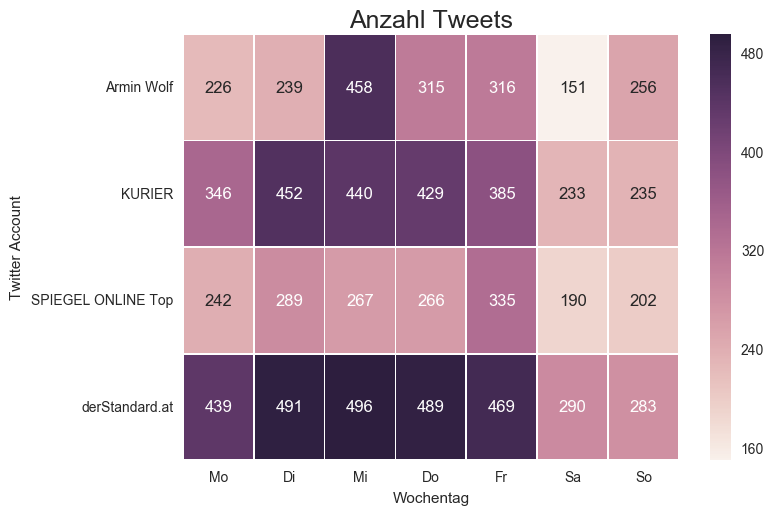

In [113]:
sns.set(style='whitegrid')
ax = sns.heatmap(df_temp, annot=True, linewidths=.5, fmt='.0f')
sns.set(font_scale=1.5)
sns.plt.title('Anzahl Tweets')
sns.set(font_scale=1)
ax.set(xlabel='Wochentag', ylabel='Twitter Account')

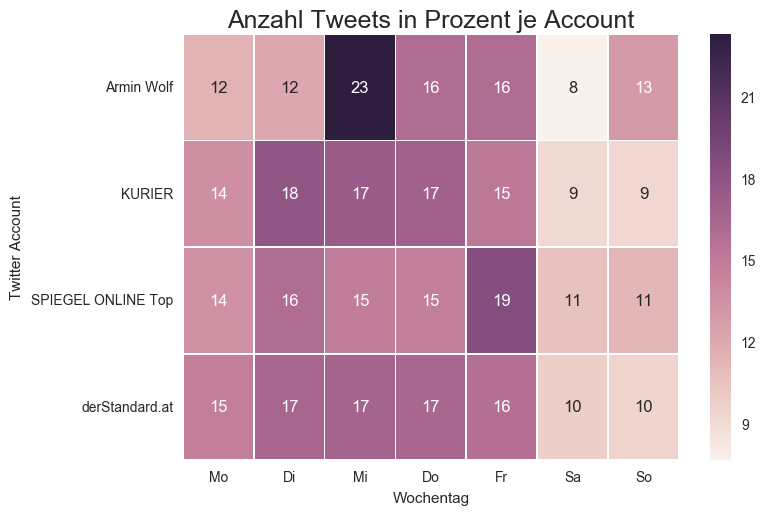

In [115]:
sns.set(style='whitegrid')
ax = sns.heatmap(df_temp.div(df_temp.sum(axis=1), axis=0) * 100, annot=True, linewidths=.5, fmt='.0f')
sns.set(font_scale=1.5)
sns.plt.title('Anzahl Tweets in Prozent je Account')
sns.set(font_scale=1)
ax.set(xlabel='Wochentag', ylabel='Twitter Account')
sns.plt.savefig('tweets_pro_wochentag.png')

In [96]:
df_temp = df.groupby([ df.name, df.created_at.dt.hour])['id'].count().unstack()
df_temp[:3]

created_at,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
name,,,,,,,,,,,,,,,,,,,,,
Armin Wolf,24.0,15.0,10.0,15.0,13.0,34.0,43.0,58.0,105.0,150.0,...,111.0,115.0,155.0,109.0,73.0,49.0,84.0,118.0,92.0,85.0
KURIER,7.0,2.0,1.0,4.0,3.0,216.0,128.0,179.0,150.0,192.0,...,169.0,127.0,103.0,145.0,110.0,96.0,79.0,20.0,9.0,7.0
SPIEGEL ONLINE Top,25.0,16.0,27.0,23.0,21.0,51.0,78.0,104.0,80.0,96.0,...,117.0,117.0,127.0,102.0,72.0,78.0,78.0,53.0,42.0,35.0


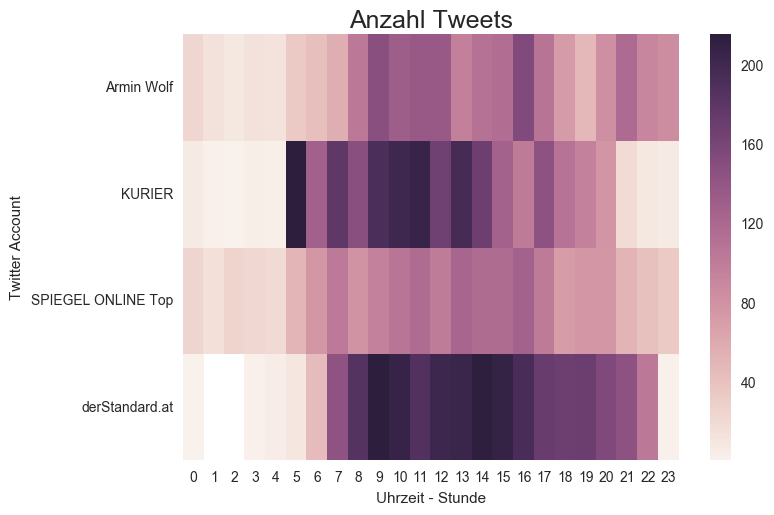

In [97]:
sns.set(style='whitegrid')
ax = sns.heatmap(df_temp)
sns.set(font_scale=1.5)
sns.plt.title('Anzahl Tweets')
sns.set(font_scale=1)
ax.set(xlabel='Uhrzeit - Stunde', ylabel='Twitter Account')

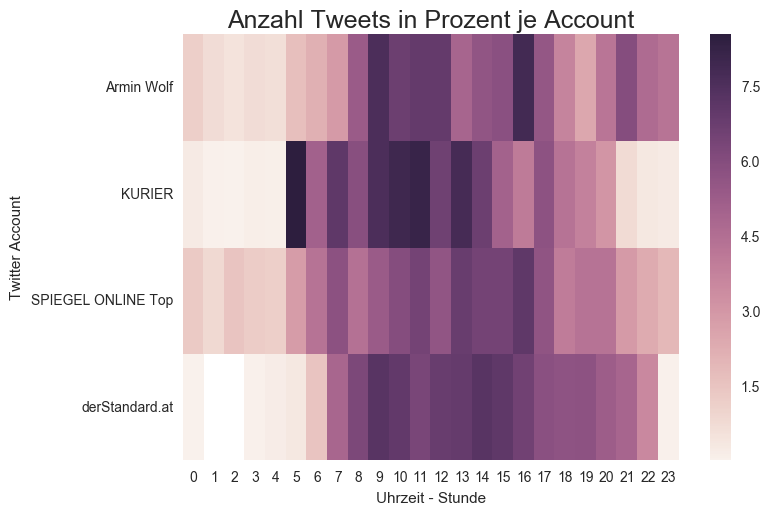

In [98]:
sns.set(style='whitegrid')
ax = sns.heatmap(df_temp.div(df_temp.sum(axis=1), axis=0) * 100)
sns.set(font_scale=1.5)
sns.plt.title('Anzahl Tweets in Prozent je Account')
sns.set(font_scale=1)
ax.set(xlabel='Uhrzeit - Stunde', ylabel='Twitter Account')
sns.plt.savefig('tweets_pro_stunde.png')

In [99]:
df_temp = df[df.name == 'Armin Wolf'].groupby([ df.created_at.dt.weekday, 
                                               df.created_at.dt.hour])['id'].count().unstack()
df_temp.index = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
df_temp

created_at,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Mo,2.0,NaN,NaN,NaN,NaN,NaN,4.0,3.0,11.0,21.0,...,4.0,12.0,12.0,7.0,9.0,1.0,15.0,28.0,17.0,25.0
Di,NaN,3.0,NaN,NaN,NaN,NaN,4.0,13.0,18.0,23.0,...,8.0,9.0,13.0,2.0,8.0,7.0,5.0,23.0,8.0,11.0
Mi,11.0,12.0,7.0,15.0,5.0,11.0,11.0,19.0,30.0,44.0,...,27.0,26.0,19.0,19.0,21.0,4.0,13.0,25.0,13.0,13.0
Do,9.0,NaN,2.0,NaN,NaN,6.0,11.0,3.0,16.0,9.0,...,15.0,17.0,40.0,28.0,4.0,11.0,18.0,11.0,23.0,17.0
Fr,NaN,NaN,1.0,NaN,8.0,17.0,11.0,18.0,20.0,23.0,...,33.0,18.0,45.0,13.0,14.0,8.0,10.0,2.0,8.0,4.0
Sa,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,8.0,10.0,...,16.0,16.0,12.0,7.0,3.0,2.0,5.0,NaN,2.0,5.0
So,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,20.0,...,8.0,17.0,14.0,33.0,14.0,16.0,18.0,29.0,21.0,10.0


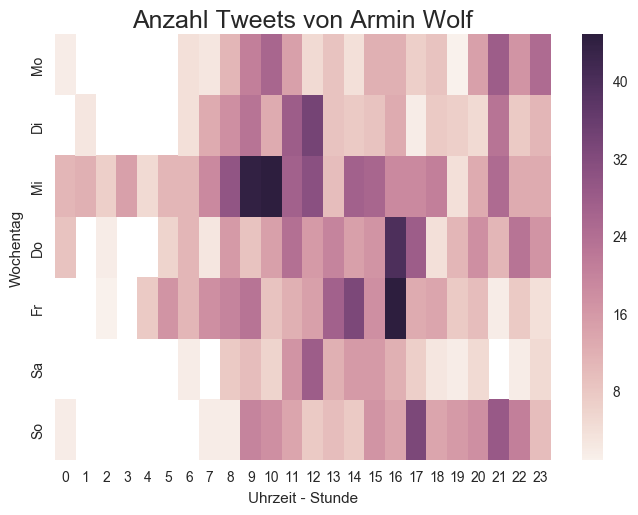

In [100]:
sns.set(style='whitegrid')
ax = sns.heatmap(df_temp)
sns.set(font_scale=1.5)
sns.plt.title('Anzahl Tweets von Armin Wolf')
sns.set(font_scale=1)
ax.set(xlabel='Uhrzeit - Stunde', ylabel='Wochentag')

In [101]:
df_temp = df.groupby([df.created_at.dt.month, df.created_at.dt.day, 
                      df.created_at.dt.hour])['id'].count().unstack()
df_temp[:3]

created_at              0    1    2   3    4     5    6     7     8     9   \
created_at created_at                                                        
11         1           2.0  NaN  NaN NaN  NaN   2.0  4.0  21.0  10.0   8.0   
           2           1.0  NaN  1.0 NaN  1.0  15.0  8.0   8.0   7.0  12.0   
           3           1.0  1.0  1.0 NaN  2.0   8.0  9.0   4.0   8.0  11.0   

created_at            ...     14   15   16    17   18   19   20   21   22   23  
created_at created_at ...                                                       
11         1          ...    4.0  7.0  4.0   5.0  5.0  9.0  7.0  6.0  3.0  NaN  
           2          ...    9.0  7.0  7.0   5.0  9.0  5.0  5.0  8.0  2.0  1.0  
           3          ...   10.0  9.0  8.0  18.0  8.0  4.0  6.0  3.0  6.0  2.0  

[3 rows x 24 columns]

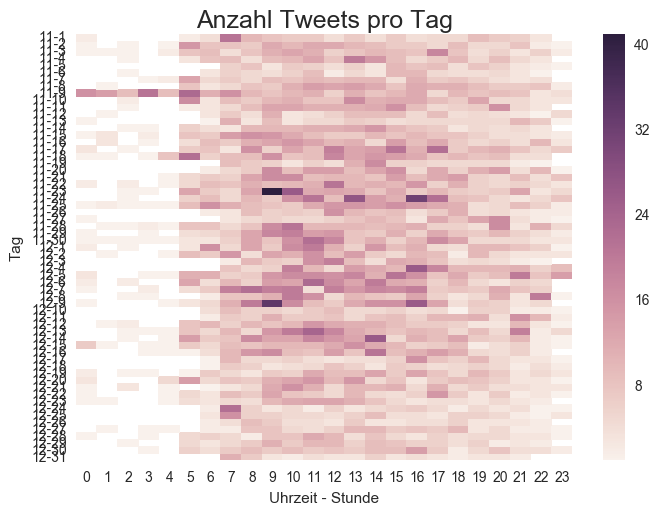

In [102]:
sns.set(style='whitegrid')
ax = sns.heatmap(df_temp)
sns.set(font_scale=1.5)
sns.plt.title('Anzahl Tweets pro Tag')
sns.set(font_scale=1)
ax.set(xlabel='Uhrzeit - Stunde', ylabel='Tag')
sns.plt.savefig('tweets_pro_tag.png')

In [103]:
df_temp = df[df.name == 'Armin Wolf'].groupby([df.created_at.dt.month, df.created_at.dt.day, 
                                               df.created_at.dt.hour])['id'].count().unstack()
df_temp[:3]

created_at             0   1    2   3    4   5   6   7   8   9  ...   14   15  \
created_at created_at                                           ...             
11         1          NaN NaN  NaN NaN  NaN NaN NaN NaN NaN NaN ...  NaN  NaN   
           2          NaN NaN  NaN NaN  1.0 NaN NaN NaN NaN NaN ...  1.0  1.0   
           3          NaN NaN  1.0 NaN  NaN NaN NaN NaN NaN NaN ...  1.0  1.0   

created_at              16  17   18   19  20   21   22  23  
created_at created_at                                       
11         1           NaN NaN  NaN  2.0 NaN  NaN  NaN NaN  
           2           2.0 NaN  1.0  NaN NaN  2.0  NaN NaN  
           3           NaN NaN  NaN  NaN NaN  NaN  2.0 NaN  

[3 rows x 24 columns]

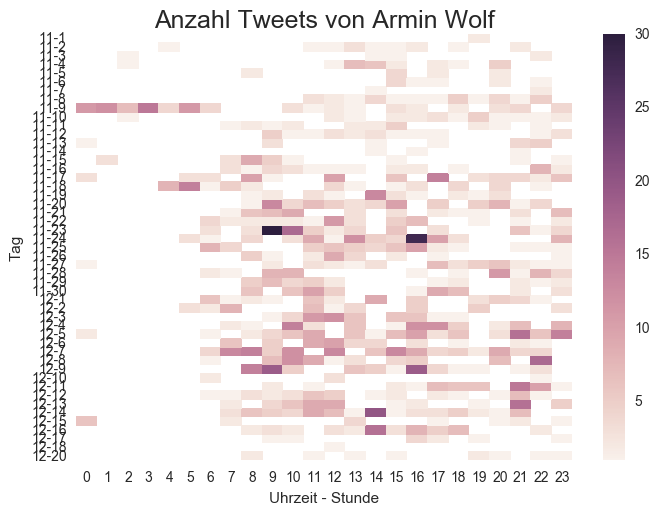

In [104]:
sns.set(style='whitegrid')
ax = sns.heatmap(df_temp)
sns.set(font_scale=1.5)
sns.plt.title('Anzahl Tweets von Armin Wolf')
sns.set(font_scale=1)
ax.set(xlabel='Uhrzeit - Stunde', ylabel='Tag')
#sns.plt.savefig('tweets_armin_wolf.svg')

In [105]:
df.loc[(df.name == 'Armin Wolf') & (df.created_at.dt.month == 11) & 
       (df.created_at.dt.day == 9) & (df.created_at.dt.hour == 3),
       ['created_at', 'text']]

,created_at,text
7664,2016-11-09 03:00:17,Oje. https://t.co/jg5LpILcXl
7663,2016-11-09 03:00:26,@RalphJanik Eh.
7662,2016-11-09 03:06:42,@pitgottschalk Ernste Frage? Der ganz links.
7661,2016-11-09 03:11:24,Die jüngste NYT-Prognose: Demnach würde Clinto...
7660,2016-11-09 03:14:06,US-Präsidenten ohne Stimmenmehrheit (popular v...
7659,2016-11-09 03:21:15,@EvaGauda US-Wahlsystem googeln. Tausendfach s...
7658,2016-11-09 03:26:33,"Trump gewinnt Ohio, sagt CNN. Das ist wirklich..."
7657,2016-11-09 03:28:39,@StefanHaboeck Das ist die Auszählung. Beziehe...
7656,2016-11-09 03:28:52,@TOMK1988 Nicht immer. Aber häufig.
7655,2016-11-09 03:31:42,So einen Wahlabend habe ich noch nie gesehen. ...


In [106]:
df_temp = df.groupby([df.created_at.dt.month, df.created_at.dt.day, 
                      df.created_at.dt.hour])['retweet_count'].sum().unstack()
df_temp[:3]

created_at              0    1     2   3    4     5     6     7     8     9   \
created_at created_at                                                          
11         1           1.0  NaN   NaN NaN  NaN   3.0   7.0  33.0  15.0  23.0   
           2           4.0  NaN   1.0 NaN  4.0   9.0  18.0  10.0  14.0   8.0   
           3           0.0  1.0  21.0 NaN  8.0  24.0   7.0   3.0   6.0  15.0   

created_at             ...      14    15    16    17    18    19    20   21  \
created_at created_at  ...                                                    
11         1           ...     1.0  15.0  18.0  14.0  39.0  30.0  23.0  7.0   
           2           ...    12.0   6.0  24.0   6.0  10.0   4.0   9.0  4.0   
           3           ...    12.0   7.0   9.0  16.0  14.0   6.0  13.0  4.0   

created_at               22     23  
created_at created_at               
11         1            7.0    NaN  
           2            5.0   12.0  
           3           10.0  155.0  

[3 rows x 24 columns]

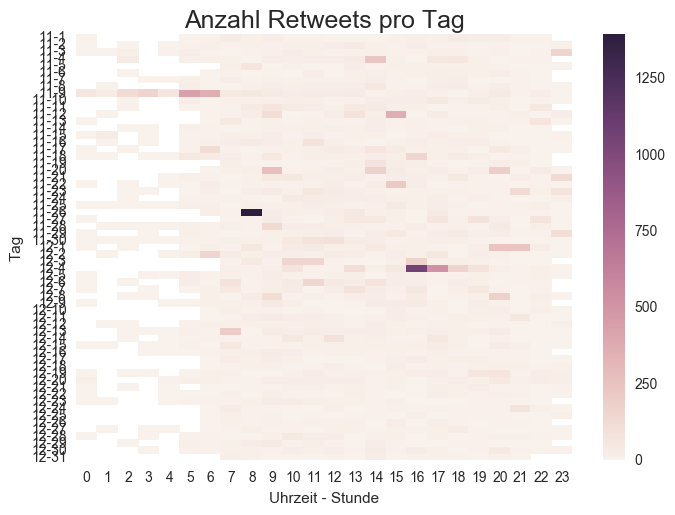

In [107]:
sns.set(style='whitegrid')
ax = sns.heatmap(df_temp)
sns.set(font_scale=1.5)
sns.plt.title('Anzahl Retweets pro Tag')
sns.set(font_scale=1)
ax.set(xlabel='Uhrzeit - Stunde', ylabel='Tag')

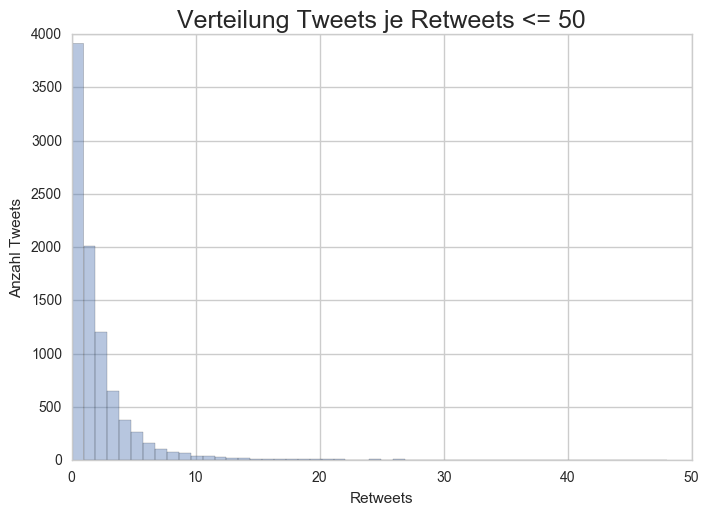

In [108]:
sns.set(style='whitegrid')
ax = sns.distplot(df.loc[df.retweet_count <= 50,'retweet_count'], kde=False)
sns.set(font_scale=1.5)
sns.plt.title('Verteilung Tweets je Retweets <= 50')
sns.set(font_scale=1)
ax.set(xlabel='Retweets', ylabel='Anzahl Tweets')
sns.plt.savefig('retweets_hist_bis_50.png')

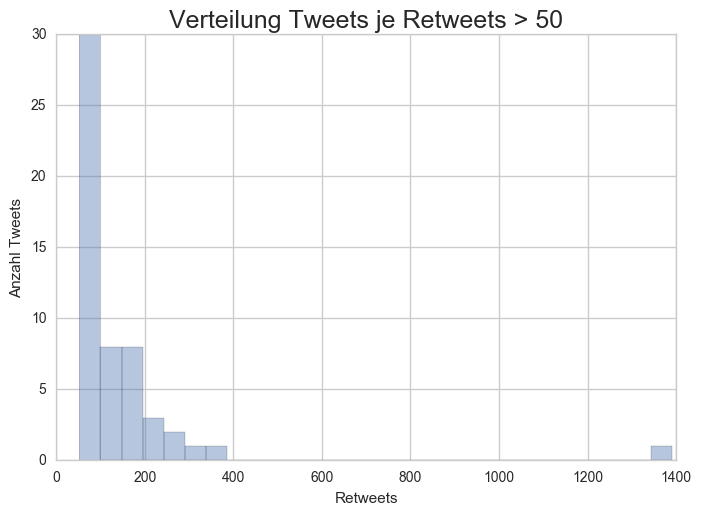

In [109]:
sns.set(style='whitegrid')
ax = sns.distplot(df.loc[df.retweet_count > 50,'retweet_count'], kde=False)
sns.set(font_scale=1.5)
sns.plt.title('Verteilung Tweets je Retweets > 50')
sns.set(font_scale=1)
ax.set(xlabel='Retweets', ylabel='Anzahl Tweets')
sns.plt.savefig('retweets_hist_ab_50.png')

In [110]:
df.sort_values('retweet_count', ascending=False).iloc[0,:]

contributors                                                               NaN
coordinates                                                                NaN
created_at                                                 2016-11-26 08:49:32
entities                     {'hashtags': [], 'urls': [], 'symbols': [], 'u...
extended_entities                                                          NaN
favorite_count                                                            3007
favorited                                                                False
geo                                                                        NaN
id                                                          802434099990462464
id_str                                                      802434099990462464
in_reply_to_screen_name                                                   None
in_reply_to_status_id                                                      NaN
in_reply_to_status_id_str                           

In [111]:
for name in df.name.unique():
    print('*' * 80)
    print(name)
    print(df[df.name == name].sort_values('retweet_count', ascending=False).iloc[0,:])
    print()

********************************************************************************
SPIEGEL ONLINE Top
contributors                                                               NaN
coordinates                                                                NaN
created_at                                                 2016-11-03 23:54:03
entities                     {'hashtags': [], 'urls': [{'expanded_url': 'ht...
extended_entities                                                          NaN
favorite_count                                                              34
favorited                                                                False
geo                                                                        NaN
id                                                          794326808586047491
id_str                                                      794326808586047488
in_reply_to_screen_name                                                    NaN
in_reply_to_status_id          

In [59]:
df_temp = df[df.name == 'Armin Wolf'].groupby([df.created_at.dt.month, df.created_at.dt.day, 
                                               df.created_at.dt.hour])['retweet_count'].sum().unstack()
df_temp[:3]

created_at             0   1     2   3    4   5   6   7   8   9  ...   14  \
created_at created_at                                            ...        
11         1          NaN NaN   NaN NaN  NaN NaN NaN NaN NaN NaN ...  NaN   
           2          NaN NaN   NaN NaN  4.0 NaN NaN NaN NaN NaN ...  0.0   
           3          NaN NaN  21.0 NaN  NaN NaN NaN NaN NaN NaN ...  6.0   

created_at              15    16  17   18   19  20   21   22  23  
created_at created_at                                             
11         1           NaN   NaN NaN  NaN  9.0 NaN  NaN  NaN NaN  
           2           5.0  13.0 NaN  0.0  NaN NaN  0.0  NaN NaN  
           3           0.0   NaN NaN  NaN  NaN NaN  NaN  8.0 NaN  

[3 rows x 24 columns]

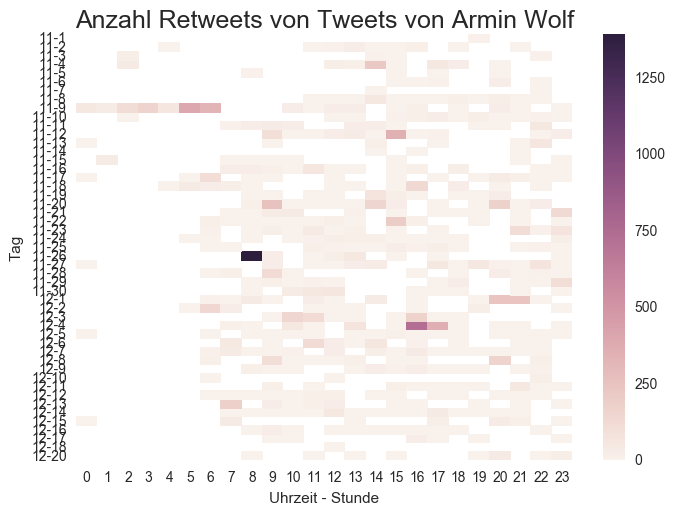

In [60]:
sns.set(style='whitegrid')
ax = sns.heatmap(df_temp)
sns.set(font_scale=1.5)
sns.plt.title('Anzahl Retweets von Tweets von Armin Wolf')
sns.set(font_scale=1)
ax.set(xlabel='Uhrzeit - Stunde', ylabel='Tag')
#sns.plt.savefig('reteets_armin_wolf.svg')